In [71]:
from traffic import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statistics as st

# Creation of Car and Simulation Objects
In this code, the parade of cars is created as new objects and passed to the simulation object. Some sample runs are then performed and representative outputs of the system's state are offered at the end.

In [72]:
Ncars = 30
positions = np.linspace(0, 1000, num=Ncars+1)
cars = [Car(positions[i]) for i in range(Ncars)]
for i in range(Ncars-1):
    cars[i].set_next(cars[i+1])
cars[Ncars-1].set_next(cars[0])

Above code establishes the array of cars needed

In [73]:
sim = Simulation(cars)
sim.run_once()

This snippet establishes the simulation and does a single round

In [74]:
sim.run(5)

Here, it is run for a few seconds

In [75]:
x_vals = np.linspace(0, Ncars, num=Ncars)

In [76]:
def plot_things():
    plt.plot(x_vals, sim.dist_array())
    plt.title("Distance to next car (m)")
    plt.xlabel("Car number")
    plt.ylabel("m")
    plt.axis((0, len(x_vals), 0, 100))
    plt.show()

    plt.plot(x_vals, sim.speed_array())
    plt.title("Speed of car (m/s)")
    plt.xlabel("Car number")
    plt.ylabel("m/s")
    plt.axis((0, len(x_vals), 0, 35))
    plt.show()

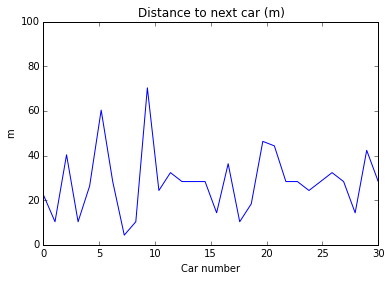

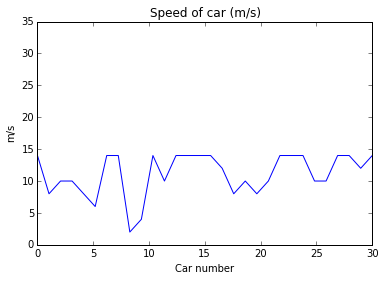

In [77]:
plot_things()

All cars begin with a speed of zero. In this cross-section of the simulation, even the fastest cars are still accelerating. They can increase speed by 2 m/s per second at most, and their top speed is 33.3 m/s. At this point, they have ran for 6 seconds, yielding a maximum speed of 12 m/s, which corresponds to the data on the plot. In spite of being early in the simulation, substantial variation in positions is already revealing itself.

In [78]:
sim.run(60)

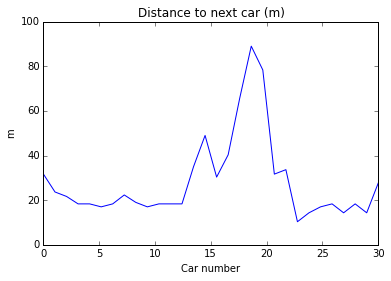

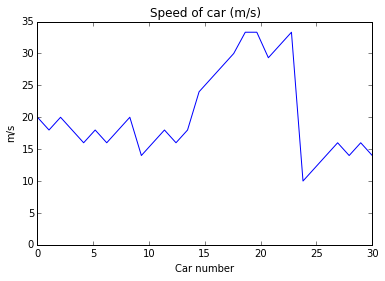

In [79]:
plot_things()

After 1 more minute, the cars have had sufficient time to accelerate to full speed. Yet, there is a very large amount of variation in the car spacing distance as well as the speed. Only a select few cars have been able to accelerate to a level close to their maximum speed. The rest of the cars are somehow constrained by the proximity of the car in front of them, and that's what most of the speed values represent.

#Statistics and the Global Picture of Normal Mode
The following code resets the simulation to time=0 and runs forward in time keeping track of variables useful for tracking the overall progress and state of the traffic moving on the road. This involves using a variety of storage containers which are graphed later on.

In [80]:
sim = Simulation(cars) # reset

In [81]:
Ntime = 2000 # 2,000 seconds = 33.3 minutes
avg_speed = [0] * Ntime
time_plt = [i for i in range(Ntime)]
full_hist = [[0 for i in range(Ncars)] for j in range(Ntime)]
speed_list = []
for i in range(Ntime):
    speed_list.append(sim.speed_array().tolist()[0])
    avg_speed[i] = sim.speed_array().mean()
    full_hist[i] = sim.pos_array()
    sim.run_once()

In [82]:
def speed_plots():
    plt.plot(time_plt[:int(Ntime/10)], avg_speed[:int(Ntime/10)])
    plt.title("Average speed over time - 200 s")
    plt.xlabel("time (s)")
    plt.ylabel("speed (m/s)")
    plt.axis((0,int(Ntime/10),0,35))
    plt.show()

    plt.plot(time_plt, avg_speed)
    plt.title("Average speed over time - 2,000 s")
    plt.xlabel("time (s)")
    plt.ylabel("speed (m/s)")
    plt.axis((0,Ntime,0,35))
    plt.show()

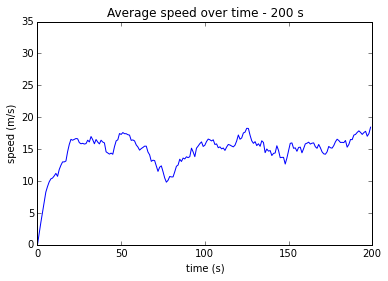

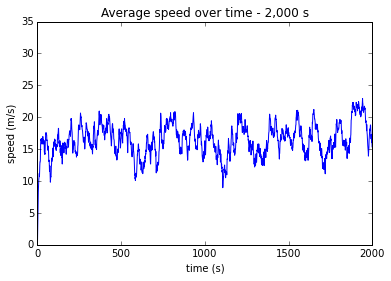

In [83]:
speed_plots()

These graphs show the evolution of the average car speed over two time frames. It is seen that speed increases quickly from zero to around 15 m/s, but then some resistence is obviously being encountered due to traffic jams. Over a longer-time picture, there is clear a large amount of natural variation about the mean.

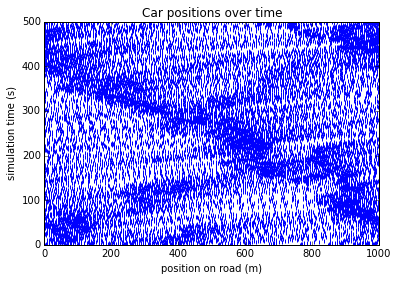

In [84]:
maxt = 500
for k in range(maxt):
    plt.scatter(full_hist[k], [k for i in range(Ncars)], marker=u'|')
plt.title("Car positions over time")
plt.xlabel("position on road (m)")
plt.ylabel("simulation time (s)")
plt.axis((0, 1000, 0, maxt))
plt.show()

This graphic shows traffic waves develop and propogate over time. There seems to be a constant rate of movement of the wave-front in the reverse of the direction of car motion. However, the behavior is overall rather complicated with some forking and diverging also seen.

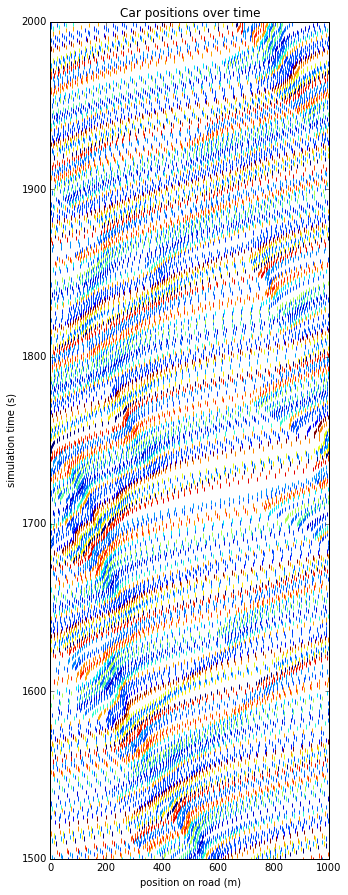

In [87]:
maxt = 500
plt.figure(figsize=(5,15))
colors = np.random.rand(Ncars)
for k in range(2000-maxt,2000):
    plt.scatter(full_hist[k], [k for i in range(Ncars)], marker=u'|', c=colors)
plt.title("Car positions over time")
plt.xlabel("position on road (m)")
plt.ylabel("simulation time (s)")
plt.axis((0, 1000, 2000-maxt, 2000))
plt.show()

This is a more detailed picture of the car positions after traffic has fully developed (with color). It can be see that traffic waves still exist, but it is not necessarily a coherent wave. The wave may somewhat dissipate and then pick up again from a spontaneous point. Or there may be various forking and merging behavior.

In [14]:
print(st.stdev(speed_list))
print(st.mean(speed_list))
spd_limit = st.mean(speed_list)+st.stdev(speed_list) # 1 standard deviation above the mean
print(spd_limit)
spd_limit = int(spd_limit*3600/1000) # convert to km/hr, round down for driver
print(spd_limit)

10.041769197565154
16.1609595
26.202728697565156
94


This concludes our reccomendation with an answer of 93 km/hr for the speed limit of the road.

#Hard Mode
In this version the cars move along a 7 km stretch of track, where each 1 km segment may have its own unique properties.

In [16]:
sim = Simulation(30, True) # car density of 30 cars/km, hard mode on

In [17]:
sim.run(5)

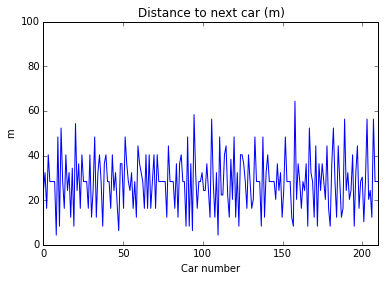

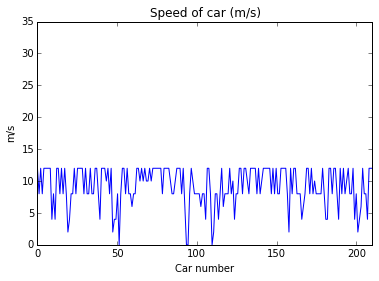

In [21]:
x_vals = np.linspace(0, 30*7, num=30*7)
plot_things()

This plot shows spacings and speed of all 30x7=210 cars along the road at 5 seconds into the simulation. The gradual speed increase can be seen. There is also a visual difference in slowdown for the central segment of the track, which has the highest chance of drivers randomly braking.

In [22]:
sim.run(60)

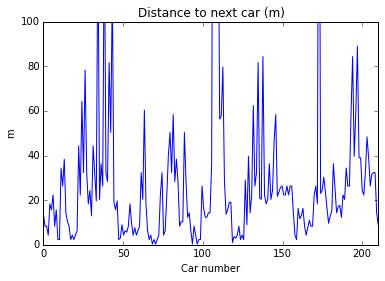

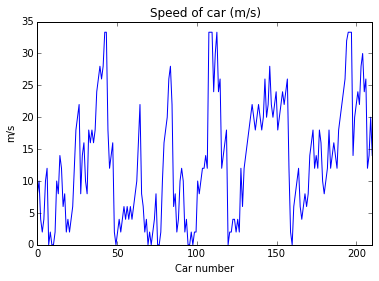

In [23]:
plot_things()

This picture of cars 60 seconds after the last snapshot displays a much more complicated picture. Some cars are going very fast but some are going very slowly. It looks like traffic jams might be a regular occurance at various locations along the road.

#Statistics and the Global Picture of Hard Mode
Simulation is rebooted, keeping several metrics to analyize later.

In [24]:
sim = Simulation(30, True)

In [25]:
Ntime = 2000 # 2,000 seconds = 33.3 minutes
avg_speed = [0] * Ntime
time_plt = [i for i in range(Ntime)]
full_hist = [[0 for i in range(Ncars)] for j in range(Ntime)]
speed_list = []
for i in range(Ntime):
    speed_list.append(sim.speed_array().tolist()[0])
    avg_speed[i] = sim.speed_array().mean()
    full_hist[i] = sim.pos_array()
    sim.run_once()

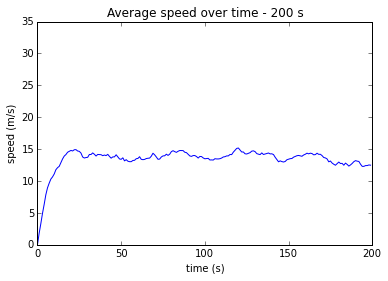

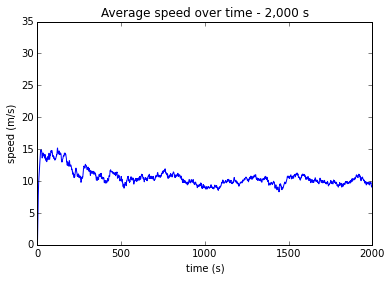

In [28]:
speed_plots()

Similar to normal mode, there is a quick increase in speed from 0 to come in line with a longer-term speed value. Interestingly, the mean speed seems to quickly fall off of an initial plateu. This might have been somewhat predictable, as the faster segments aren't as hindered by echo effects from the rocky segments for the first few segements. After the first minute or two, the rocky parts of the road may be sending traffic waves into the faster stretches and disrupting traffic there.

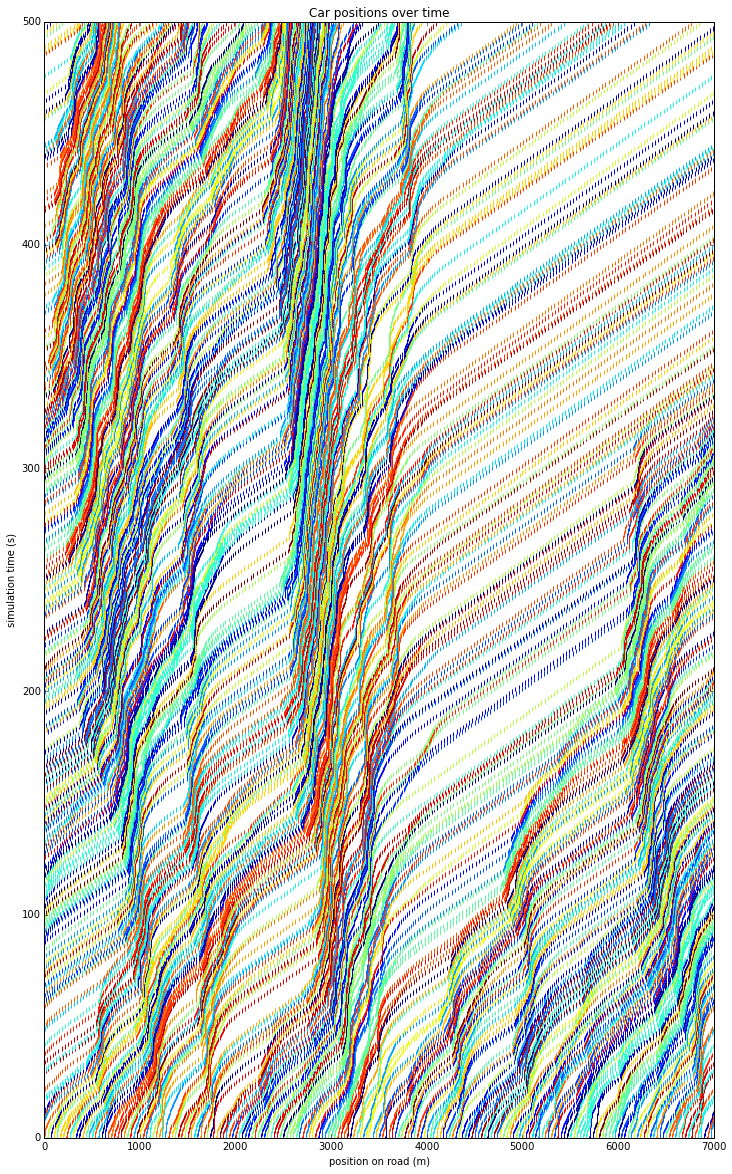

In [63]:
maxt = 500
plt.figure(figsize=(12,20))
colors = np.random.rand(30*7) # color level = Austin Powers
for k in range(maxt):
    plt.scatter(full_hist[k], [k for i in range(30*7)], marker=u'|', c=colors)
plt.title("Car positions over time")
plt.xlabel("position on road (m)")
plt.ylabel("simulation time (s)")
plt.axis((0, 7000, 0, maxt))
plt.show()

In the first 500 seconds, the traffic pattern is setill developing. You can see traffic waves spontaneously emerge, and then later consolidate.

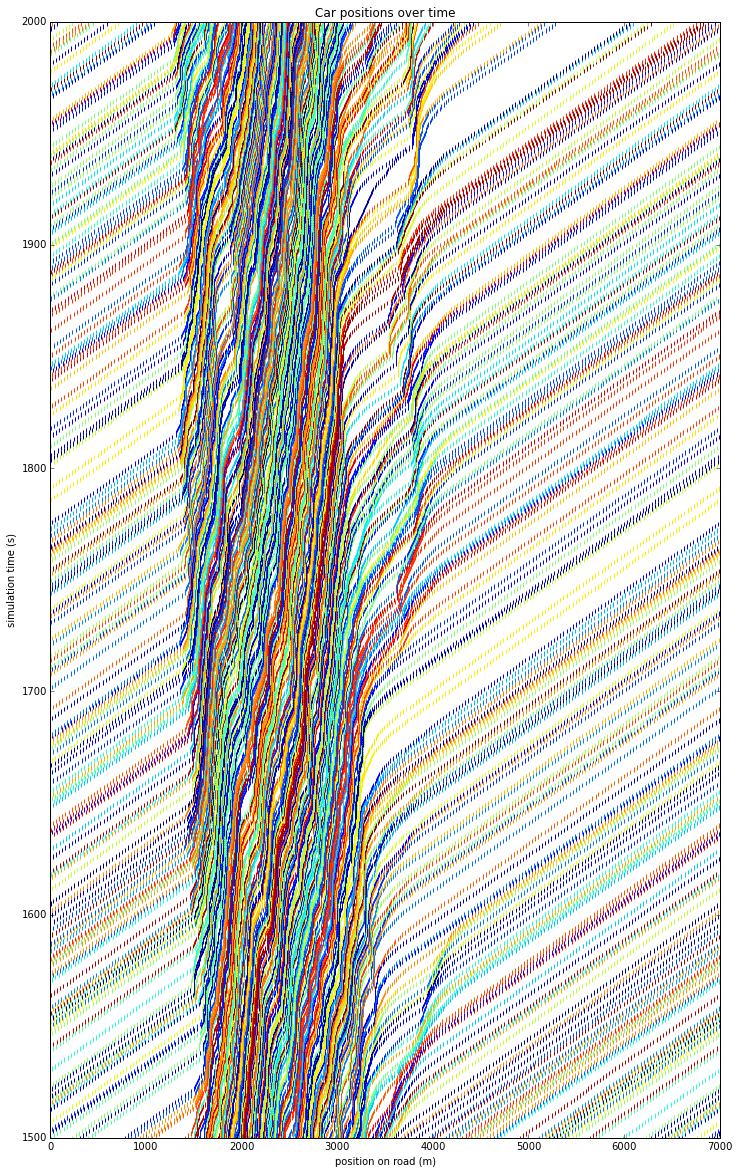

In [65]:
maxt = 500
plt.figure(figsize=(12,20))
colors = np.random.rand(30*7)
for k in range(2000-maxt,2000):
    plt.scatter(full_hist[k], [k for i in range(30*7)], marker=u'|', c=colors)
plt.title("Car positions over time")
plt.xlabel("position on road (m)")
plt.ylabel("simulation time (s)")
plt.axis((0, 7000, 2000-maxt, 2000))
plt.show()

After sufficient time has passed in the simulation, the traffic pattern has fully matured and we get a very different picture. Almost all of the bottleneck is concentrated around the start of the rockiest section of the road. Between 3000 to 4000 meters on the distance of this road, the chance of braking is 20% every second. Traffic is backed up almost a mile behind the 3 km point, even though this section would otherwise flow smoothly. Even along the 3-4 km section there doesn't appear to be much congestion. However, upon closer inspection it can be seen that cars still travel at a slower speed through this segment. It just happens that the main traffic wave is stationary and lies at the start of the rockiest section. This is a meaningful conclusion of this simulation if it is a real effect.

In [70]:
std = st.stdev(speed_list[1500:])
mean = st.mean(speed_list[1500:])
print("    Speed stats - fully developed regime")
print(" standard dev: "+str(round(std,3))+" average: "+str(round(mean,3)))
spd_limit = st.mean(speed_list)+st.stdev(speed_list) # 1 standard deviation above the mean
print(spd_limit)
spd_limit = int(spd_limit*3600/1000) # convert to km/hr, round down for driver
print("reccomended speed limit: "+str(spd_limit) + " km/h")

    Speed stats - fully developed regime
 standard dev: 12.929 average: 12.624
23.407471792713068
reccomended speed limit: 84 km/h


This is the final conclusion of this project's hard mode. The suggsted speed limit would be 84 km/h, which is notably slower than the normal mode. This should not be surprising since this 7 km stretch generally consists of more difficult terrain.